In [1]:
import numpy as np

In [2]:
# Day 1
data = np.loadtxt('day1.txt')
print(np.sum(data[1:] > data[:-1]))
#print(np.sum(np.diff(data) > 0))
#print(np.sum(np.diff(data[0:-2] + data[1:-1] + data[2:]) > 0))
print(np.sum(data[3:] > data[:-3]))

1521
1543


In [3]:
# Day 2
pos = [0,0]
with open('day2.txt', 'r') as f:
    for line in f:
        direction, distance = line.split(' ')
        if direction[0] == 'f':
            pos[0] += int(distance)
        elif direction[0] == 'u':
            pos[1] -= int(distance)
        else:
            pos[1] += int(distance)
print(pos[0]*pos[1])

pos = [0,0]
aim = 0
with open('day2.txt', 'r') as f:
    for line in f:
        direction, distance = line.split(' ')
        d = int(distance)
        if direction[0] == 'f':
            pos[0] += d
            pos[1] += aim*d
        elif direction[0] == 'u':
            aim -= d
        else:
            aim += d
print(pos[0]*pos[1])


2215080
1864715580


In [4]:
# Day 3
data = np.loadtxt('day3.txt', converters={0:lambda s: [c for c in s]}, dtype=np.chararray) - 48
tmp = data.sum(0)/data.shape[0] + 0.5 + 1e-16
tmp = tmp.astype(int)
gamma = ''.join([str(t) for t in tmp])
epsilon = ''.join([str(int(not t)) for t in tmp])
print(int(gamma, 2)*int(epsilon, 2))

mask1 = np.ones(data.shape[0], dtype=bool)
for j in range(data.shape[1]):
    N_most_common = np.sum(mask1)
    if N_most_common <= 1:
        break
    most_common  = int(np.sum(data[mask1,j])/N_most_common + 0.5 + 1e-16)
    mask1 &= (data[:,j] == most_common)

mask2 = np.ones(data.shape[0], dtype=bool)
for j in range(data.shape[1]):
    N_least_common = np.sum(mask2)
    if N_least_common <= 1:
        break
    least_common = int(np.sum(data[mask2,j])/N_least_common + 0.5 + 1e-16)
    mask2 &= mask2 & (data[:,j] != least_common)
    
oxygen = ''.join([str(t) for t in data[mask1, :][0]])
co2scrubber = ''.join([str(t) for t in data[mask2, :][0]])
print(int(oxygen, 2)*int(co2scrubber, 2))


1307354
482500


In [5]:
# Day 4
class BingoBoard:
    def __init__(self, bingo_array):
        self.bingo_array = bingo_array
        self.marked = np.zeros(bingo_array.shape, dtype=bool)
        self.sum = np.sum(bingo_array)
        self.done = False
    
    def mark_number(self, value):
        col_list, row_list = np.where(self.bingo_array == value)
        if len(col_list > 0):
            col, row = col_list[0], row_list[0]
            self.marked[col, row] = True
            self.sum -= value
            if np.all(self.marked[:,row]) or np.all(self.marked[col, :]):
                self.done = True
                return self.sum*value
        return 0
    
with open('day4.txt', 'r') as f:
    for line in f:
        numbers = [int(s) for s in line.split(',')]
        break

A = np.loadtxt('day4.txt', skiprows=1, dtype=int)
bingo_plates = [BingoBoard(A[5*i:5*(i + 1), :]) for i in range(100)]

winners = []
for num in numbers:
    for index, b in enumerate(bingo_plates):
        if b.done:
            continue
        tmp = b.mark_number(num)
        if tmp > 0:
            winners.append((index, tmp))

            
print(winners[0], winners[-1])


(71, 49860) (22, 24628)


4745
18442


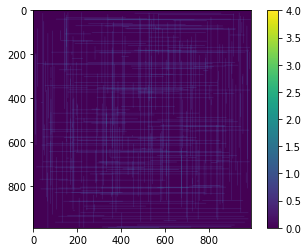

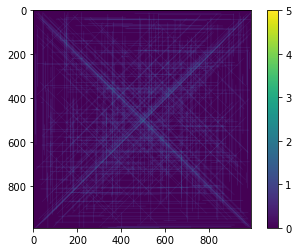

In [6]:
# Day 5
import matplotlib.pyplot as plt
points = []
with open('day5.txt', 'r') as f:
    for line in f:
        points.append([int(u) for u in line.replace('->',',').split(',')])
points_array = np.array(points)
xmax0 = max(np.max(points_array[:,0]), np.max(points_array[:,2]))
ymax0 = max(np.max(points_array[:,1]), np.max(points_array[:,3]))

my_map = np.zeros((xmax0 + 1, ymax0 + 1), dtype=int)
for x1, y1, x2, y2 in points_array:
    xmin, xmax = min(x1, x2), max(x1, x2)
    ymin, ymax = min(y1, y2), max(y1, y2)
    if (xmin != xmax) and (ymin == ymax):
        my_map[xmin:xmax + 1, ymin] += 1
    elif (xmin == xmax) and (ymin != ymax):
        my_map[xmin, ymin:ymax + 1] += 1
print(np.sum([my_map > 1]))
plt.imshow(my_map)
plt.colorbar()

my_map = np.zeros((xmax0 + 1, ymax0 + 1), dtype=int)
for x1, y1, x2, y2 in points_array:
    xmin, xmax = min(x1, x2), max(x1, x2)
    ymin, ymax = min(y1, y2), max(y1, y2)
    xdir = np.sign(x2 - x1) 
    ydir = np.sign(y2 - y1)
    vx = np.arange(xmax - xmin + 1)
    vy = np.arange(ymax - ymin + 1)
    my_map[x1 + xdir*vx, y1 + ydir*vy] += 1
    
plt.figure()
plt.imshow(my_map)
plt.colorbar()

print(np.sum([my_map > 1]))

In [7]:
# Day 6
data = np.loadtxt('day6.txt', delimiter=',', dtype=int)
n = 9
population = np.zeros(n, dtype=int)
for d in data:
    population[d] += 1
#for age, count in zip(*np.unique(data, return_counts=True)):
#    population[age] = count

index_start = 0
for days in range(256):
    population[(index_start + 7) % n] += population[index_start]
    index_start = (index_start + 1) % n
    if days == 79 or days == 255:
        print(np.sum(population))
    #print([population[(index_start + j) % n] for j in range(9)])

380758
1710623015163


In [8]:
# Day 7
data = np.loadtxt('day7.txt', delimiter=',', dtype=int)

pos, count = np.unique(data, return_counts=True)
fuel_cost = [np.sum(np.abs(pos - j)*count) for j in range(pos[0], pos[-1] + 1)]
print(np.min(fuel_cost))

cost = lambda d:d*(d+1)//2
fuel_cost = [np.sum(cost(np.abs(pos - j))*count) for j in range(pos[0], pos[-1] + 1)]
print(np.min(fuel_cost))

329389
86397080


In [9]:
# Day 8
data = np.loadtxt('day8.txt', dtype=np.chararray)

# Part 1:
occurences = 0
length_filters = [2, 3, 4, 7]
for d in data[:,11:]:
    for s in d:
        if len(s) in length_filters:
            occurences += 1
print(occurences)

# Part 2:
inp = [[0,1,2,4,5,6], [2,5], [0,2,3,4,6], [0,2,3,5,6], [1,2,3,5], [0,1,3,5,6], [0,1,3,4,5,6],
       [0,2,5], [0,1,2,3,4,5,6], [0,1,2,3,5,6]]
inp_set = [set(t) for t in inp]
alphabet = {c:i for i, c in enumerate('abcdefg')}

def get_unique_info(list_of_strings, list_of_segment_lists):
    s = ''.join(list_of_strings)
    c, counts_c = np.unique([x for x in s], return_counts=True)
    i, counts_i = np.unique(np.hstack(list_of_segment_lists), return_counts=True)
    
    out = []
    for j in range(min(counts_c), max(counts_c) + 1):
        letters = c[counts_c == j]
        indices = i[counts_i == j]
        if indices.shape[0] == 0:
            continue
        out.append((''.join(letters), indices))
    return out

def use_information(info, corr):
    indices = [alphabet[c] for c in info[0]]
    n = corr.shape[0]
    
    mask_col = np.ones(n, dtype=bool)
    mask_col[info[1]] = False
    mask_row = np.ones(n, dtype=bool)
    mask_row[indices] = False
    
    for i in indices:
        corr[mask_col, i] = False
    for j in info[1]:
        corr[j, mask_row] = False

def get_translation(list_of_strings):
    correlation = np.ones((7,7), dtype=bool)
    info_tot = get_unique_info(list_of_strings, inp)
    # 1 and 7 turns out to be redundant:
    #info_tot.append(([s for s in list_of_strings if len(s) == 2][0], inp[1])) #1
    #info_tot.append(([s for s in list_of_strings if len(s) == 3][0], inp[7])) #7
    info_tot.append(([s for s in list_of_strings if len(s) == 4][0], inp[4])) #4
    for info in info_tot:
        use_information(info, correlation)
    ix, iy = np.where(correlation.T)
    return iy

def get_number_from_string(input_string, iy):
    segment_list = set([iy[alphabet[c]] for c in input_string])
    return inp_set.index(segment_list)

def get_number_from_list_of_strings(list_of_strings, iy):
    return int(''.join([str(get_number_from_string(s, iy)) for s in list_of_strings]))

out = 0
for row in data:
    iy = get_translation(row[:10])
    out += get_number_from_list_of_strings(row[11:], iy)
    
print(out)


476
1011823


514
1103130


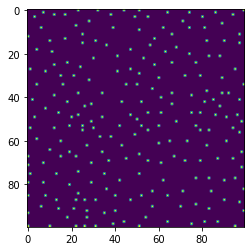

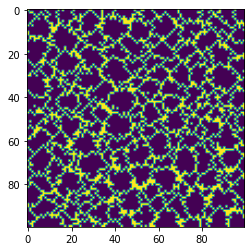

In [10]:
# Day 9
data = np.loadtxt('day9.txt', converters={0:lambda s:[int(c) - 48 for c in s]}, dtype=int)
is_low = np.empty(data.shape, dtype=bool)

is_low[1:-1,1:-1] = ((data[1:-1,1:-1] < data[0:-2,1:-1]) & (data[1:-1,1:-1] < data[2:,1:-1]) & 
 (data[1:-1,1:-1] < data[1:-1,0:-2]) & (data[1:-1,1:-1] < data[1:-1,2:]))

is_low[1:-1,0] = (data[1:-1,0] < data[1:-1,1]) & (data[1:-1,0] < data[0:-2,0]) & (data[1:-1,0] < data[2:,0])
is_low[1:-1,-1] = (data[1:-1,-1] < data[1:-1,-2]) & (data[1:-1,-1] < data[0:-2,-1]) & (data[1:-1,-1] < data[2:,-1])
is_low[0,1:-1] = (data[0,1:-1] < data[1,1:-1]) & (data[0,1:-1] < data[0,0:-2]) & (data[0,1:-1] < data[0,2:])
is_low[-1,1:-1] = (data[-1,1:-1] < data[-2,1:-1]) & (data[-1,1:-1] < data[-1,0:-2]) & (data[-1,1:-1] < data[-1,2:])
is_low[0,0] = (data[0,0] < data[0,1]) & (data[0,0] < data[1,0])
is_low[0,-1] = (data[0,-1] < data[0,-2]) & (data[0,-1] < data[1,-1])
is_low[-1,0] = (data[-1,0] < data[-1,1]) & (data[-1,0] < data[-2,0])
is_low[-1,-1] = (data[-1,-1] < data[-1,-2]) & (data[-1,-1] < data[-2,-1])

print(np.sum(data[is_low] + 1))

barriers = data == 9
direction_vectors = {'N':[-1, 0], 'S':[1, 0], 'E':[0, 1], 'W':[0, -1]}
def walk_the_walk(point, direction, all_points):
    for new_direction in ['N', 'S', 'E', 'W']:
        vector = direction_vectors[new_direction]
        new_point = [point[0] + vector[0], point[1] + vector[1]]
        if -1 < new_point[0] < data.shape[0] and -1 < new_point[1] < data.shape[1] and not barriers[new_point[0], new_point[1]]:
            flat_index = new_point[0]*data.shape[1] + new_point[1]
            if flat_index not in all_points:
                all_points.add(flat_index)
                walk_the_walk(new_point, new_direction, all_points)

indices_x, indices_y = np.where(is_low)

plt.figure()
plt.imshow(is_low)
plt.figure()
plt.imshow(barriers)
size_holes = []
for ix, iy in zip(indices_x, indices_y):
    all_points = set()
    walk_the_walk([ix, iy], 'N', all_points)
    size_holes.append(len(all_points))
    #plt.figure()
    #data2 = data.copy()
    #for p in all_points:
    #    ix = p // data.shape[1]
    #    iy = p % data.shape[1]
    #    data2[ix, iy] = -10
    #plt.imshow(data2)
    #plt.colorbar()

size_holes_sorted = np.sort(size_holes)
print(size_holes_sorted[-3]*size_holes_sorted[-2]*size_holes_sorted[-1])



In [11]:
# Day 10
openings = ['(', '[','{','<']
closings = [')', ']','}','>']

matched_closing = {openings[j]:closings[j] for j in range(len(openings))}
points_dict = {')':3, ']':57, '}':1197, '>':25137}

def get_auto_complete_points(s):
    points = 0
    add_points_dict = {')':1, ']':2, '}':3, '>':4}
    for c in s:
        points *= 5
        points += add_points_dict[c]
    return points

syntax_points = 0
auto_complete_points = []
with open('day10.txt', 'r') as f:
    for line in f:
        state = []
        syntax_error = False
        for c in line:
            if c in openings:
                state.append(c)
            elif c in closings:
                if len(state) == 0:
                    #print('Mismatched parantheses!')
                    syntax_error = True
                    break
                else:
                    last_open = state.pop()
                    expected_ending = matched_closing[last_open]
                    if expected_ending != c:
                        #print(f'Syntax error: got {c}, expected {expected_ending}!')
                        syntax_points += points_dict[c]
                        syntax_error = True
                        break
        if len(state) != 0 and not syntax_error:
            #print('Unexpected line end!')
            auto_complete_list = [matched_closing[c] for c in state[::-1]]
            auto_complete_points.append(get_auto_complete_points(''.join(auto_complete_list)))
            
print(syntax_points)
auto_complete_points_sorted = np.sort(auto_complete_points)
print(auto_complete_points_sorted[auto_complete_points_sorted.shape[0]//2])


268845
4038824534


In [12]:
# Day 11
data = np.loadtxt('day11.txt', converters={0:lambda s:[int(c) - 48 for c in s]}, dtype=int)

def flash_point(point, data, is_exploding):
    j, i = point
    for vx in [-1, 0, 1]:
        for vy in [-1, 0, 1]:
            if vx == 0 and vy == 0:
                continue
            jj = j + vx
            ii = i + vy
            if jj < 0 or jj >= data.shape[0] or ii < 0 or ii >= data.shape[1]:
                continue
            data[jj, ii] += 1
            if data[jj, ii] > 9 and not is_exploding[jj, ii]:
                is_exploding[jj, ii] = True
                flash_point([jj, ii], data, is_exploding)

N_flashes = 0
step = 0
sync_step = -1
N_flashes_after_100_steps = -1
while step < 100 or sync_step < 0:
    data += 1
    is_exploding = data > 9
    ix, iy = np.where(is_exploding)
    for ix, iy in zip(ix,iy):
        flash_point([ix, iy], data, is_exploding)
    N_flashes_step = np.sum(is_exploding)
    N_flashes += N_flashes_step
    if N_flashes_step == data.shape[0]*data.shape[1] and sync_step < 0:
        sync_step = step + 1
    if step == 99:
        N_flashes_after_100_steps = N_flashes
    
    data[is_exploding] = 0
    step += 1
    
print(N_flashes_after_100_steps)
print(sync_step)


1686
360


In [13]:
# Day 12
connections = {}
with open('day12.txt', 'r') as f:
    for line in f:
        vert1, vert2 = line.strip('\n').split('-')
        if vert1 in connections:
            connections[vert1].append(vert2)
        else:
            connections[vert1] = [vert2]
        if vert2 in connections:
            connections[vert2].append(vert1)
        else:
            connections[vert2] = [vert1]

def explore(cave, path, exclusions):
    global N_paths
    for neighbour in connections[cave]:
        if neighbour == 'start' or (neighbour in exclusions and super_nice_cave in exclusions):
            continue
        elif neighbour == 'end':
            #all_paths.append(','.join(path + ['end']))
            N_paths += 1
        else:
            if neighbour.islower():
                new_exclusions = exclusions.copy()
                if neighbour in new_exclusions:
                    new_exclusions.add(super_nice_cave)
                else:
                    new_exclusions.add(neighbour)
            else:
                new_exclusions = exclusions
            explore(neighbour, path + [neighbour], new_exclusions)

N_paths = 0
super_nice_cave = 'super_nice_cave'
explore('start', ['start'], {super_nice_cave})    
print(N_paths)

N_paths = 0
explore('start', ['start'], set())
print(N_paths)

3779
96988


807


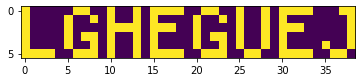

In [14]:
# Day 13
folds = []
XY = []
with open('day13.txt', 'r') as f:
    for line in f:
        if not line.strip():
            continue
        elif line[0] == 'f':
            s1, s2 = line.split('=')
            col = 0 if s1[-1] == 'x' else 1 
            folds.append((col, int(s2)))
        else:
            x, y = line.split(',')
            XY.append([int(x) ,int(y)])

XY = np.array(XY, dtype=int)
def apply_fold(A, position):
    A[A > position] = 2*position - A[A > position]

def count_unique(XY):
    return len({z for z in (XY[:,0]*2147483648 + XY[:,1])})

apply_fold(XY[:,folds[0][0]], folds[0][1])
print(count_unique(XY))

for fold_column, position in folds[1:]:
    apply_fold(XY[:,fold_column], position)
xmax, ymax = XY.max(axis=0)
Z = np.zeros((ymax + 1, xmax + 1), dtype=bool)
Z[XY[:,1], XY[:,0]] = True
plt.imshow(Z)

In [16]:
# Day 14
rules = []
exclude_chars = {' ', '\n', '-', '>'}
with open('day14.txt', 'r') as f:
    starting_polymer = f.readline().strip()
    for line in f:
        if not line.strip():
            continue
        rules.append([c for c in line if c not in exclude_chars])

s = set([c for rule in rules for c in rule])
s.update({c for c in starting_polymer})
letters = {letter:index for index, letter in enumerate(s)}
n = len(letters)

rules_numbers = np.array([[letters[c] for c in tmp] for tmp in rules])

density_matrix = np.zeros((n, n), dtype=int)
for j in range(len(starting_polymer) - 1):
    l1, l2 = starting_polymer[j], starting_polymer[j + 1]
    density_matrix[letters[l1], letters[l2]] += 1

def apply_rules(R, M):
    change = np.zeros(M.shape, dtype=int)
    for x, y, z in R:
        s = M[x, y]
        change[x, z] += s
        change[z, y] += s
        change[x, y] -= s
    M += change

def apply_rules_numpy(R, M):
    # x y z: M[x, z] += M[x, y], M[z, y] += M[x, y], M[x, y] -= M[x, y]
    source = M[R[:,0], R[:,1]]
    flat_index1 = R[:,0]*M.shape[1] + R[:,2]
    flat_index2 = R[:,2]*M.shape[1] + R[:,1]
    
    result = np.bincount(flat_index1, source, n*n)
    result += np.bincount(flat_index2, source, n*n)
    
    M[R[:,0], R[:,1]] = 0
    M += result.astype(int).reshape((n,n))
        
def max_min_diff(A):
    s = A.sum(axis=0)
    # s counts the times a letter is *last* in a pair, so we need to add the first letter of the starting polymer!
    s[letters[starting_polymer[0]]] += 1
    return np.max(s) - np.min(s)

for j in range(40):
    apply_rules_numpy(rules_numbers, density_matrix)
    if j == 9 or j == 39:
        print(max_min_diff(density_matrix))


2947
3232426226464
